## Importing necessary Libraries

In [10]:
#Libraries import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


## Using image generator the train and Valid data images are processed

In [11]:
train_dir='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir='New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'  # Fill in new pixels after rotation or shifting
)

# Define data generator for validation data (usually without augmentation)
valid_datagen = ImageDataGenerator(
    rescale=1.0/255  # Only rescale pixel values for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## 1. Basic CNN model Architecture

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout to reduce overfitting
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  # Increased dropout for deeper layers
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Final dropout before the output layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping and Model Check point
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,  # Reduced epochs
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
2197/2197 [==============================] - 720s 328ms/step - loss: 2.5063 - accuracy: 0.2835 - val_loss: 1.4788 - val_accuracy: 0.5537
Epoch 2/30


c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2197/2197 [==============================] - 722s 329ms/step - loss: 1.6358 - accuracy: 0.5009 - val_loss: 0.9435 - val_accuracy: 0.7025
Epoch 3/30
2197/2197 [==============================] - 720s 328ms/step - loss: 1.3140 - accuracy: 0.5929 - val_loss: 0.7495 - val_accuracy: 0.7650
Epoch 4/30
2197/2197 [==============================] - 713s 325ms/step - loss: 1.1199 - accuracy: 0.6505 - val_loss: 0.6656 - val_accuracy: 0.7898
Epoch 5/30
2197/2197 [==============================] - 714s 325ms/step - loss: 0.9821 - accuracy: 0.6925 - val_loss: 0.5604 - val_accuracy: 0.8249
Epoch 6/30
2197/2197 [==============================] - 716s 326ms/step - loss: 0.8853 - accuracy: 0.7222 - val_loss: 0.5145 - val_accuracy: 0.8342
Epoch 7/30
2197/2197 [==============================] - 717s 326ms/step - loss: 0.8073 - accuracy: 0.7465 - val_loss: 0.3936 - val_accuracy: 0.8740
Epoch 8/30
2197/2197 [==============================] - 720s 328ms/step - loss: 0.7435 - accuracy: 0.7673 - val_loss: 0.514

Train and Validation accruacy for the basic CNN architecture

In [7]:
train_loss,train_acc=model.evaluate(train_generator)
valid_loss,valid_acc=model.evaluate(valid_generator)
train_acc,valid_acc

550/550 [==============================] - 31s 56ms/step - loss: 0.2170 - accuracy: 0.9336


(0.9316025376319885, 0.9335875511169434)

Saving the training history and the Model for basic CNN architecture

In [9]:
import json
with open('history.json','w+') as f:
    json.dump(history.history,f)
    print('Saved the model history')
model.save('Plant Disease CNN.keras')

Saved the model history


## 2. Increasing the Epochs for the model 

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Dropout to reduce overfitting
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),  # Increased dropout for deeper layers
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Final dropout before the output layer
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping and Model Check point
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model1.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,  # Reduced epochs
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
2197/2197 [==============================] - 1137s 516ms/step - loss: 2.6004 - accuracy: 0.2539 - val_loss: 1.5109 - val_accuracy: 0.5343
Epoch 2/50


c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2197/2197 [==============================] - 712s 324ms/step - loss: 1.5884 - accuracy: 0.5170 - val_loss: 0.9722 - val_accuracy: 0.6953
Epoch 3/50
2197/2197 [==============================] - 710s 323ms/step - loss: 1.2062 - accuracy: 0.6264 - val_loss: 0.6701 - val_accuracy: 0.7883
Epoch 4/50
2197/2197 [==============================] - 712s 324ms/step - loss: 1.0263 - accuracy: 0.6789 - val_loss: 0.6512 - val_accuracy: 0.7881
Epoch 5/50
2197/2197 [==============================] - 825s 376ms/step - loss: 0.9066 - accuracy: 0.7178 - val_loss: 0.5630 - val_accuracy: 0.8212
Epoch 6/50
2197/2197 [==============================] - 716s 326ms/step - loss: 0.8255 - accuracy: 0.7423 - val_loss: 0.5778 - val_accuracy: 0.8089
Epoch 7/50
2197/2197 [==============================] - 716s 326ms/step - loss: 0.7622 - accuracy: 0.7631 - val_loss: 0.4968 - val_accuracy: 0.8461
Epoch 8/50
2197/2197 [==============================] - 716s 326ms/step - loss: 0.7019 - accuracy: 0.7820 - val_loss: 0.368

Saving the model and training history for the model with increased accuracy 

In [5]:
import json
with open('history1.json','w+') as f:
    json.dump(history.history,f)
    print('Saved the model history')
model.save('Plant Disease CNN2.keras')   
train_loss,train_acc=model.evaluate(train_generator)
valid_loss,valid_acc=model.evaluate(valid_generator)
train_acc,valid_acc

Saved the model history
550/550 [==============================] - 31s 56ms/step - loss: 0.1601 - accuracy: 0.9522


(0.9429831504821777, 0.9521966576576233)

## Pre trained VGG Model

In [10]:
# Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
model1 = Sequential()
model1.add(base_model)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(38, activation='softmax'))  # 38 classes

# Compile the model
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50  # Adjust epochs as needed
)

Epoch 1/50
2197/2197 [==============================] - 1727s 786ms/step - loss: 1.9141 - accuracy: 0.4152 - val_loss: 0.8272 - val_accuracy: 0.7321
Epoch 2/50
2197/2197 [==============================] - 1708s 778ms/step - loss: 1.4802 - accuracy: 0.5249 - val_loss: 0.6833 - val_accuracy: 0.7900
Epoch 3/50
2197/2197 [==============================] - 1711s 779ms/step - loss: 1.3893 - accuracy: 0.5529 - val_loss: 0.6311 - val_accuracy: 0.7995
Epoch 4/50
2197/2197 [==============================] - 1707s 777ms/step - loss: 1.3264 - accuracy: 0.5710 - val_loss: 0.6036 - val_accuracy: 0.8045
Epoch 5/50
2197/2197 [==============================] - 1712s 779ms/step - loss: 1.2958 - accuracy: 0.5807 - val_loss: 0.6068 - val_accuracy: 0.8053
Epoch 6/50
2197/2197 [==============================] - 1712s 779ms/step - loss: 1.2635 - accuracy: 0.5902 - val_loss: 0.5537 - val_accuracy: 0.8180
Epoch 7/50
2197/2197 [==============================] - 1715s 781ms/step - loss: 1.2487 - accuracy: 0.5914

Saving the training history and model for VGG

In [11]:
import json
with open('history_vgg.json','w+') as f:
    json.dump(history.history,f)
    print('Saved the model history')
model.save('Plant Disease CNN_VGG.keras')   

Saved the model history
550/550 [==============================] - 329s 599ms/step - loss: 0.4256 - accuracy: 0.8615


(0.8400170803070068, 0.861484169960022)

## Using image generator the test data images are processed

In [23]:
# Define the test directory
test_dir = '../plant_diseases_prediction/test/'
test_datagen= ImageDataGenerator(
    rescale=1.0/255  # Only rescale pixel values for validation
)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator.class_indices

Found 33 images belonging to 1 classes.


{'test': 0}

## Comparing the training and Valid accuracy for the models

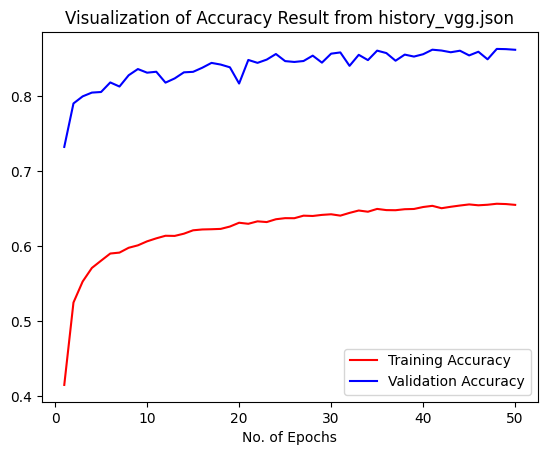

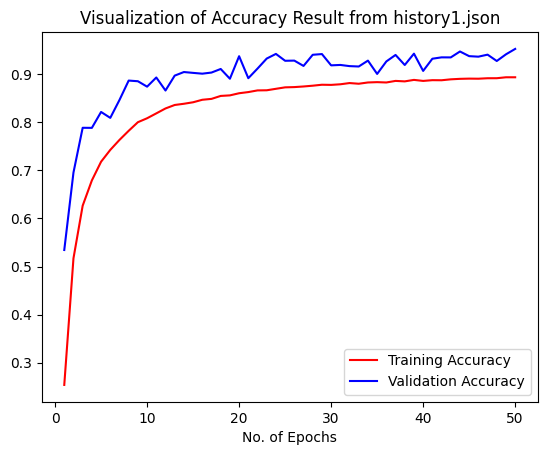

In [5]:
import json

training_histories=['history_vgg.json','history1.json']
for i in training_histories:
    with open(i, 'r') as file:
        training_history = json.load(file)
        epochs = [j for j in range(1,51)]
        plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
        plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
        plt.xlabel('No. of Epochs')
        plt.title(f'Visualization of Accuracy Result from {i}')
        plt.legend()
        plt.show()

## Comparing the model performace on test data images

In [9]:
models=["Plant Disease CNN_VGG.keras","Plant Disease CNN.keras","Plant Disease CNN2.keras",
        'best_model.h5','best_model1.h5']
model_performance=pd.DataFrame(index=models)
testloss=[]
testaccuracy=[]
for model in models:
    print(model)
    model=load_model(model)
    test_loss,test_acc=model.evaluate(test_generator)
    testloss.append(test_loss)
    testaccuracy.append(test_acc)
model_performance['test_loss']=testloss
model_performance['test_accuracy']=testaccuracy
model_performance

Plant Disease CNN_VGG.keras
550/550 [==============================] - 31s 56ms/step - loss: 0.1601 - accuracy: 0.9522
Plant Disease CNN.keras
550/550 [==============================] - 30s 54ms/step - loss: 0.2170 - accuracy: 0.9336
Plant Disease CNN2.keras
550/550 [==============================] - 32s 58ms/step - loss: 0.1601 - accuracy: 0.9522
best_model.h5
550/550 [==============================] - 38s 68ms/step - loss: 0.2170 - accuracy: 0.9336
best_model1.h5
550/550 [==============================] - 34s 61ms/step - loss: 0.1601 - accuracy: 0.9522


,test_loss,test_accuracy
Plant Disease CNN_VGG.keras,0.160097,0.952197
Plant Disease CNN.keras,0.217027,0.933588
Plant Disease CNN2.keras,0.160097,0.952197
best_model.h5,0.217027,0.933588
best_model1.h5,0.160097,0.952197


#### Based on the above comparisons we can see the CNN architecture model performance is better in all train, valid and test data. Whereas the VGG performance is poor in train and valid data. Hence we will be using the "best_model1.h5" model for the Streamlit application as well

C:\Users\mypc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


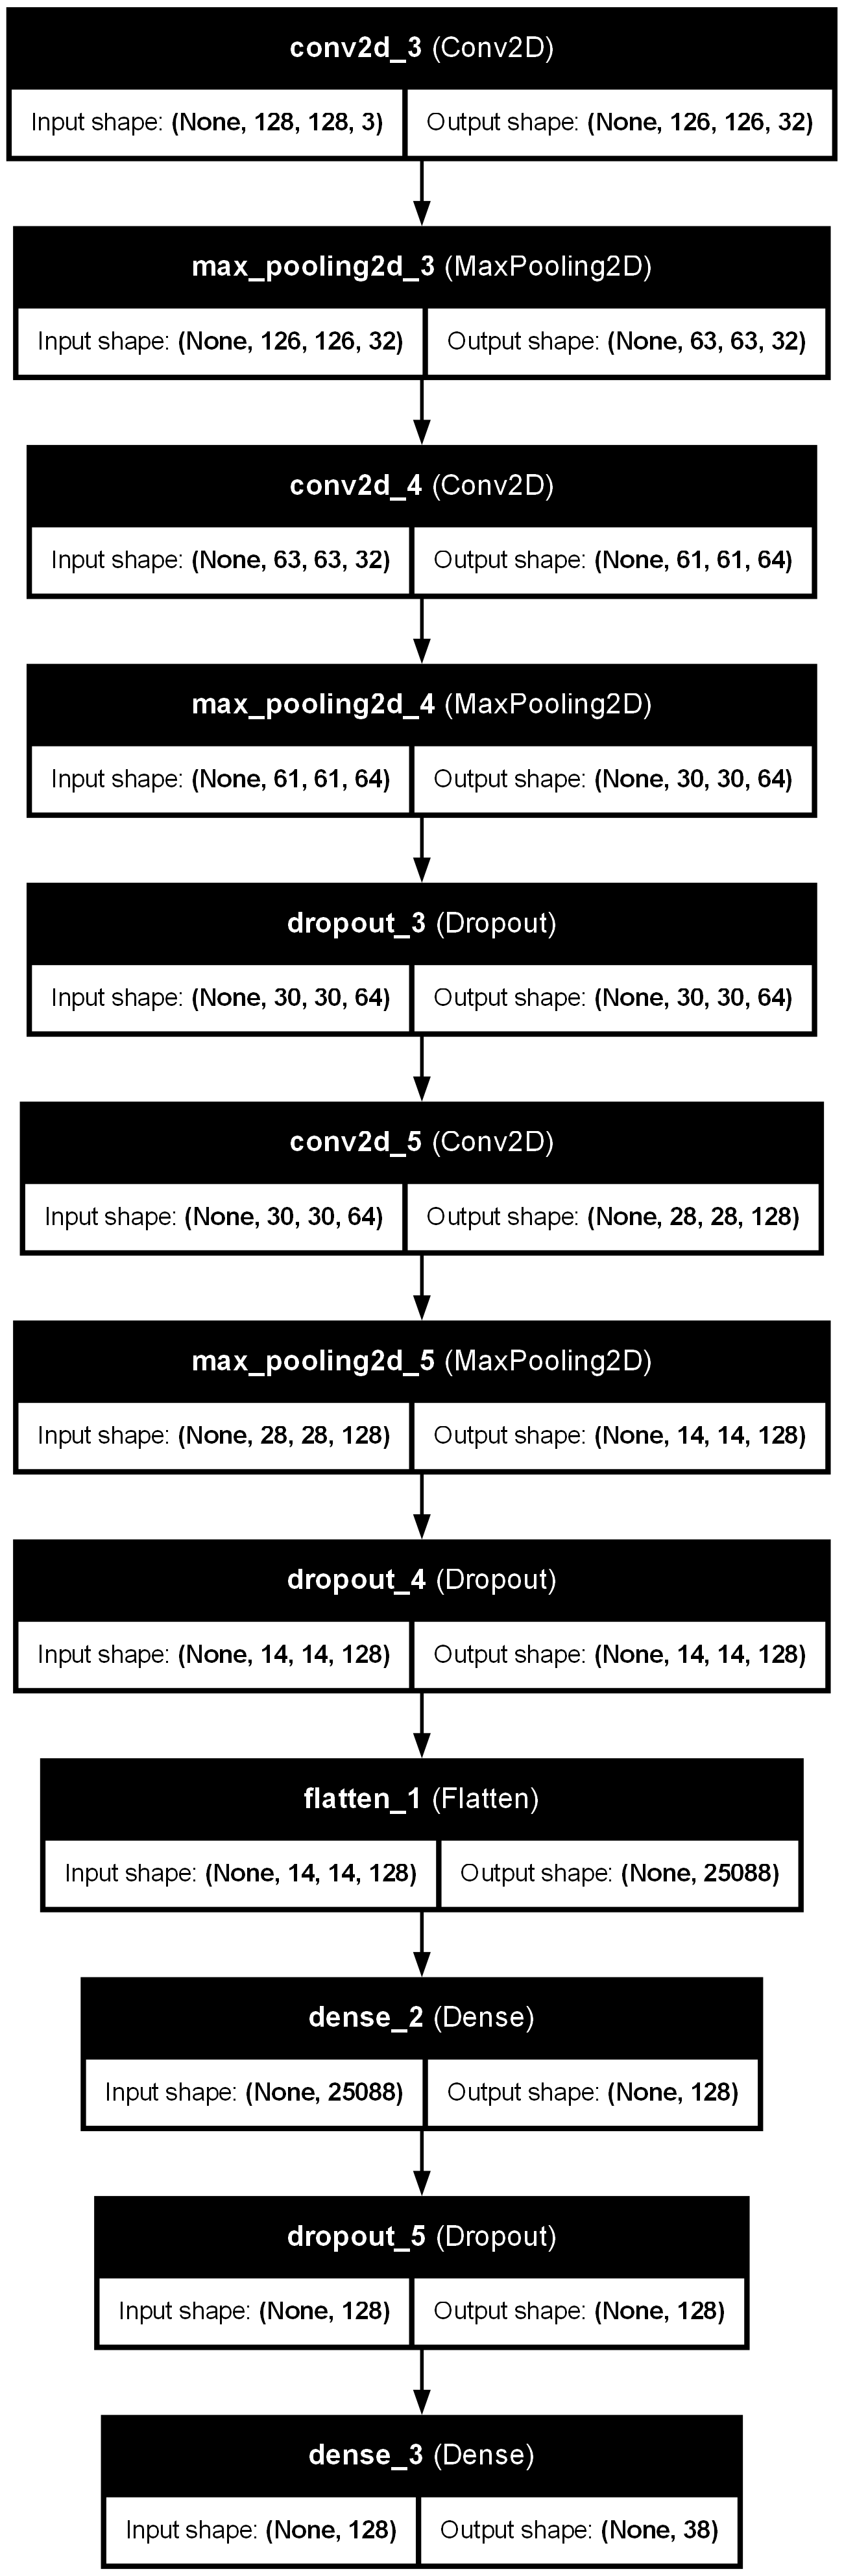

In [37]:
from tensorflow.keras.utils import plot_model
model=load_model('best_model1.h5')
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

C:\Users\mypc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


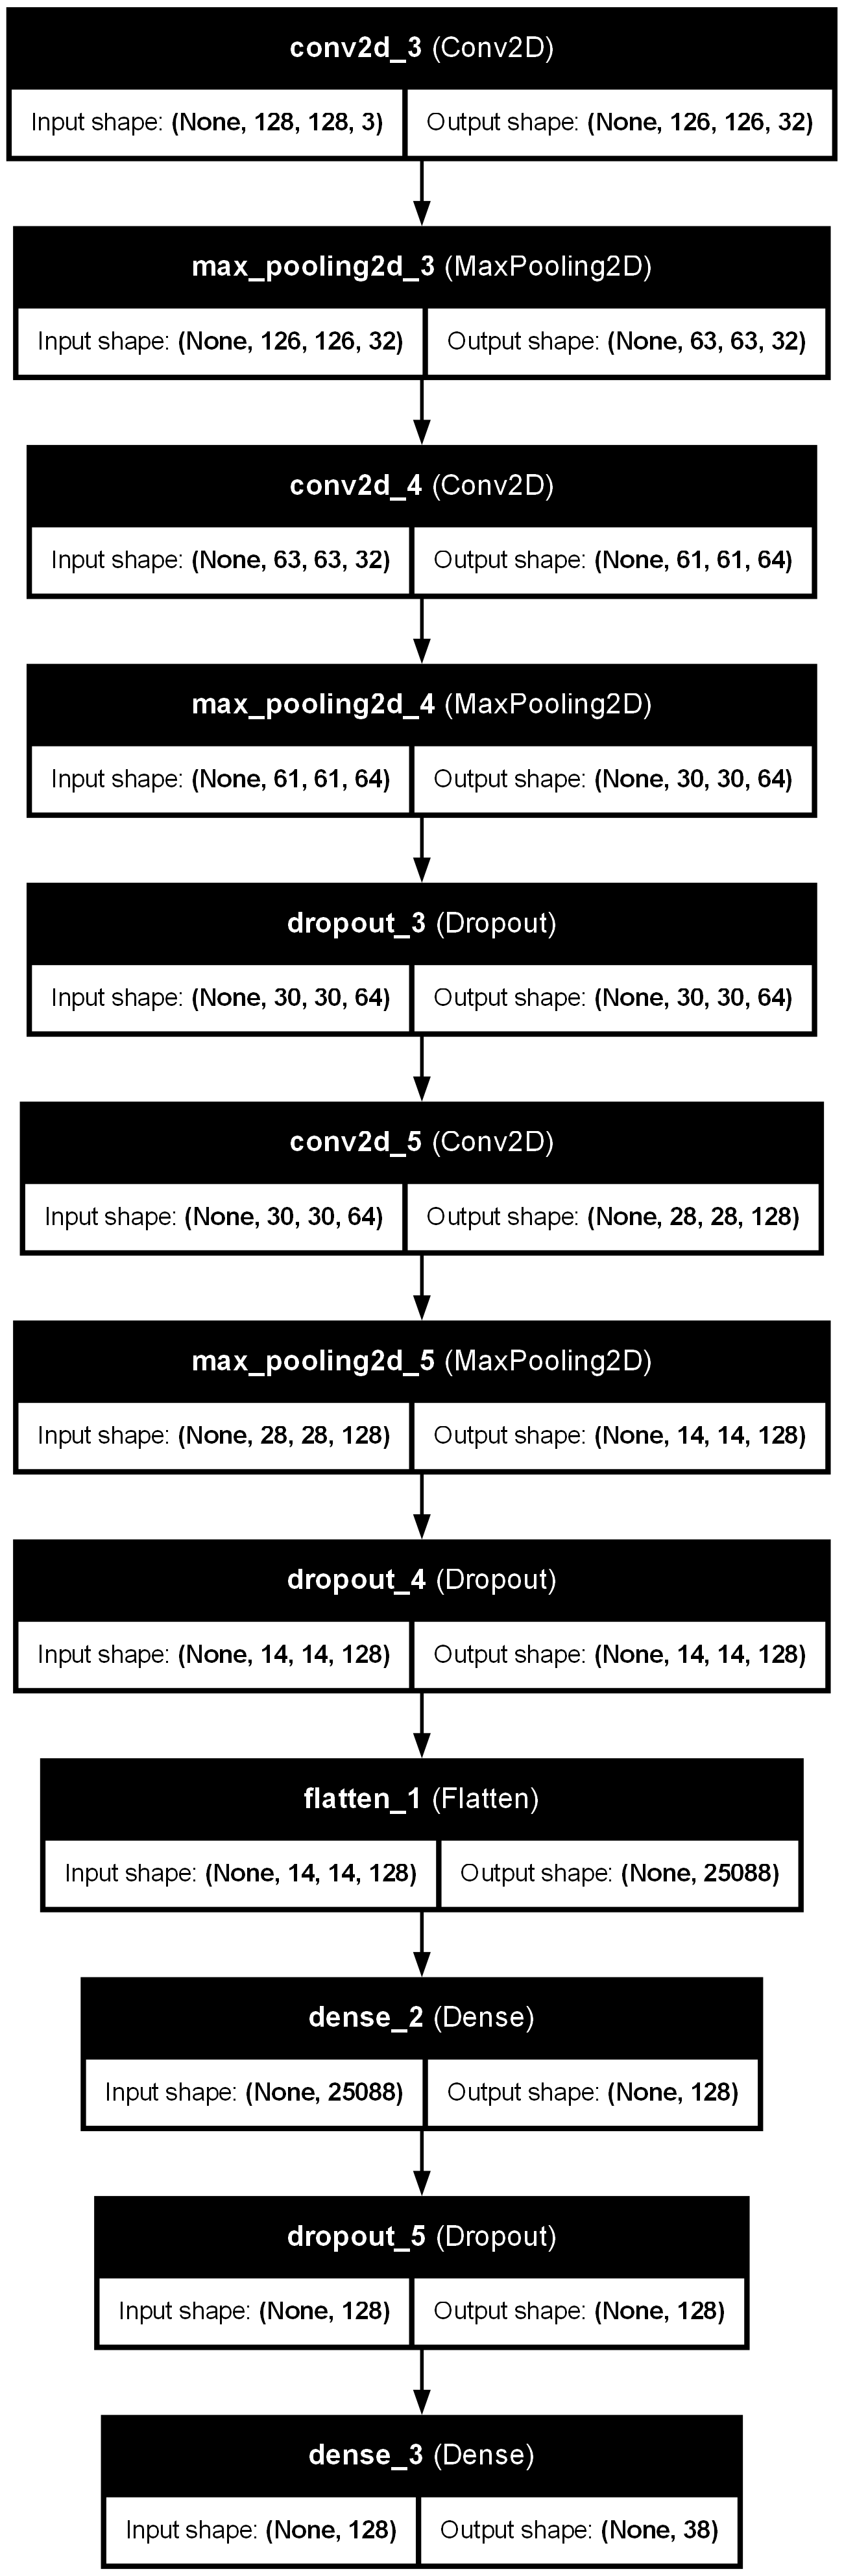

In [2]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
model=load_model('best_model_vgg.h5')
plot_model(model, to_file='vgg_model.png', show_shapes=True, show_layer_names=True)